In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def mnk_intercept(X, Y, resolution=10000):
    if isinstance(X, pd.Series): X = X.to_numpy()
    if isinstance(Y, pd.Series): Y = Y.to_numpy()
    
    a = (X@Y)/(X@X)
    min_loss = np.sum((Y - a * X)**2)
    def relative_loss(delta):
        return np.sum((Y - (a + delta) * X)**2) / min_loss
    
    delta = 0
    
    step = a / resolution
    while relative_loss(delta) < 2:
        delta += step
    
    
    def f(x):
        return a * x
    
    return a, delta, f


def mnk(X, Y):
    a, b = np.polyfit(X, Y, deg=1)
    
    S_x = np.std(X) ** 2
    S_y = np.std(Y) ** 2
    da = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X) - 2))
    db = da * np.sqrt(np.mean(X**2))
    
    def f(x):
        return a*x + b
    
    return a, b, da, db, f

In [2]:
r = 5.1
V1 = 95; dV1 = 0.5
V2 = 74.2

vax = pd.read_csv('vax.csv')
vax['U_stab'] = vax['U'] - r * vax['I']
vax.head(3)

,U,I,rising,U_stab
0,0.0249,0.012,1,-0.0363
1,15.7000,0.013,1,15.6337
2,38.8000,0.014,1,38.7286


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


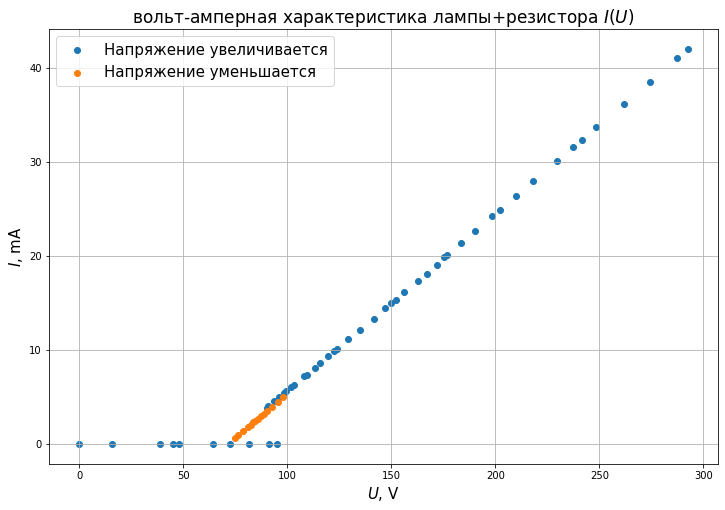

In [3]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title(r"вольт-амперная характеристика лампы+резистора $I(U)$", fontsize=17)
plt.ylabel(r"$I$, mA", fontsize=15)
plt.xlabel(r"$U$, V", fontsize=15)

rising_slc = vax['rising'] == 1


plt.scatter(vax.loc[rising_slc, 'U'], vax.loc[rising_slc, 'I'], label='Напряжение увеличивается')
plt.scatter(vax.loc[~rising_slc, 'U'], vax.loc[~rising_slc, 'I'], label='Напряжение уменьшается')
plt.legend(fontsize=15)

plt.savefig('../pictures/R_IU.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


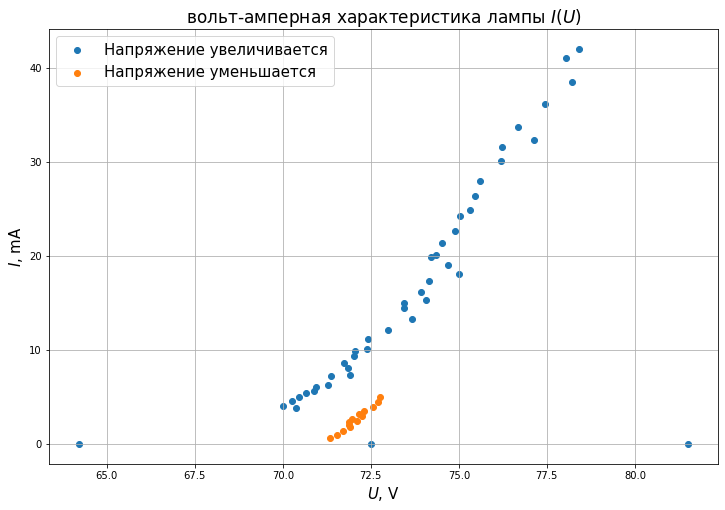

In [6]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title(r"вольт-амперная характеристика лампы $I(U)$", fontsize=17)
plt.ylabel(r"$I$, mA", fontsize=15)
plt.xlabel(r"$U$, V", fontsize=15)

rising_slc = vax['rising'] == 1


X = vax.loc[rising_slc, 'U_stab']
Y = vax.loc[rising_slc, 'I']
slc = (X > 60) & (X < 85)
plt.scatter(X[slc], Y[slc], label='Напряжение увеличивается')


X = vax.loc[~rising_slc, 'U_stab']
Y = vax.loc[~rising_slc, 'I']
slc = (X > 60) & (X < 85)
plt.scatter(X[slc], Y[slc], label='Напряжение уменьшается')
plt.legend(fontsize=15)

plt.savefig('../pictures/stab_IU.eps')

In [5]:
T_C = pd.read_csv("T_C.csv")
U = 115; dU = 0.5
R = 500
def T_C_theory(C):
    return 0.001 * R * C * np.log((U - V2)/(U - V1))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.4742788048637167 0.02001456556524881


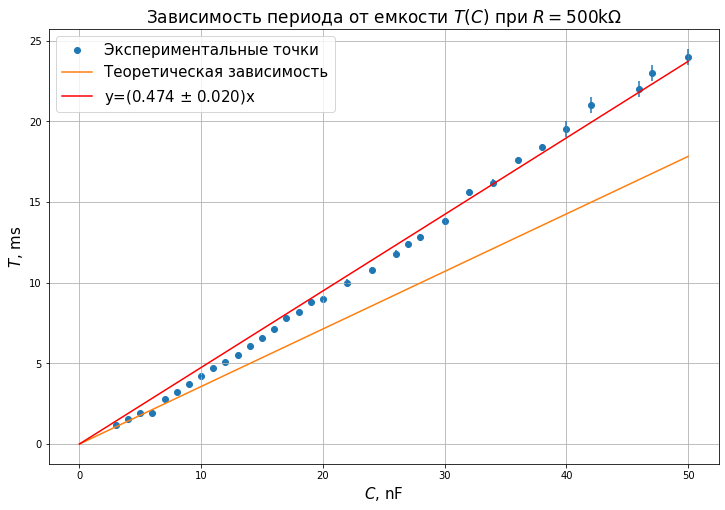

In [6]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title(r"Зависимость периода от емкости $T(C)$ при $R=500$k$\Omega$", fontsize=17)
plt.ylabel(r"$T$, ms", fontsize=15)
plt.xlabel(r"$C$, nF", fontsize=15)

X = T_C["C"].to_numpy()
Y = T_C["T"].to_numpy()
dY = T_C["dT"].to_numpy()

plt.scatter(X, Y, label='Экспериментальные точки')
plt.errorbar(X, Y, yerr=dY, linestyle='')

x_mm = np.array([0, 50])
plt.plot(x_mm, T_C_theory(x_mm), label='Теоретическая зависимость')

a, da, f = mnk_intercept(X, Y)
print(a, da)
plt.plot(x_mm, f(x_mm), c='red', label=r'y=(0.474 $\pm$ 0.020)x')

plt.legend(fontsize=15)
plt.savefig('../pictures/T_C.eps')

In [7]:
np.polyfit(x_mm, T_C_theory(x_mm), deg=1)

array([0.3564749, 0.       ])

In [8]:
# найдем динамический потенциал V2_dyn

V2_dyn = U - np.exp(a/(R*0.001)) * (U - V1)
dV2_dyn = np.sqrt((np.exp(a)*(U-V1)*da/(0.001*R))**2 + ((1-np.exp(a/(R*0.001)))*dU)**2 + (np.exp(a/(R*0.001))*dV1)**2)
print(V2_dyn, dV2_dyn)

63.3603450933209 1.9867568607761552


In [9]:
T_R = pd.read_csv("T_R.csv")
U = 115.2; dU = 0.5
C = 50
def T_R_theory(R):
    return 0.001 * R * C * np.log((U - V2)/(U - V1))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.05104520703857717 0.0022561981511051285


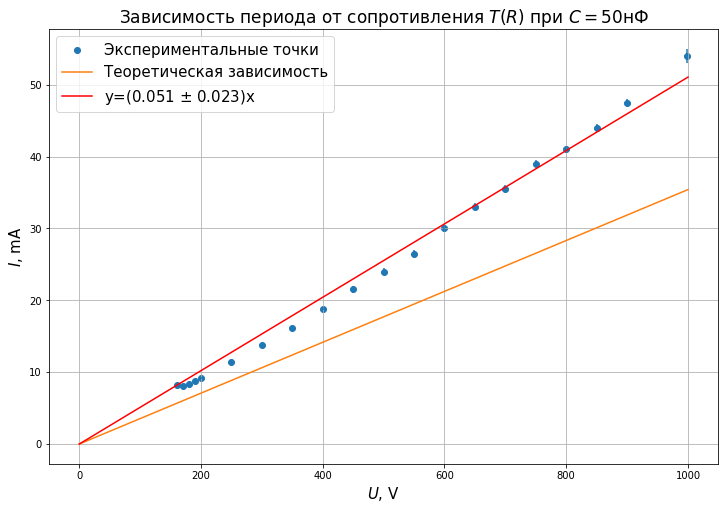

In [10]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title(r"Зависимость периода от сопротивления $T(R)$ при $C=50$нФ", fontsize=17)
plt.ylabel(r"$I$, mA", fontsize=15)
plt.xlabel(r"$U$, V", fontsize=15)

X = T_R["R"].to_numpy()
Y = T_R["T"].to_numpy()
dY = T_R["dT"].to_numpy()

plt.scatter(X, Y, label='Экспериментальные точки')
plt.errorbar(X, Y, yerr=dY, linestyle='')

x_mm = np.array([0, 1000])
plt.plot(x_mm, T_R_theory(x_mm), label='Теоретическая зависимость')

a, da, f = mnk_intercept(X, Y)
print(a, da)
plt.plot(x_mm, f(x_mm), c='red', label=r'y=(0.051 $\pm$ 0.023)x')

plt.legend(fontsize=15)
plt.savefig('../pictures/T_R.eps')

In [11]:
# найдем динамический потенциал V2_dyn

V2_dyn = U - np.exp(a/(C*0.001)) * (U - V1)
dV2_dyn = np.sqrt((np.exp(a)*(U-V1)*da/(0.001*C))**2 + ((1-np.exp(a/(C*0.001)))*dU)**2 + (np.exp(a/(C*0.001))*dV1)**2)
print(V2_dyn, dV2_dyn)

59.1307942235071 1.9064506101179641
